# Evaluation of LES against satellite and ground-based observations (ProgNa)

* The below notebook compares selected simulations against observational targets that were collected from satellite and ground-based retrievals.
* In case of questions or concerns, please notify Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [20]:
%run functions_plotting.py 
 
## select simulations to plot
sim_keyword = 'dx100_ProgNa.'  

In [2]:
## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load radiosondes
rs_dat = load_rs(t_filter = 7.)

## load DOE ARM site statistics
kazrkollias_dat = load_kazrkollias(t_filter = 6.,aux_dat=rs_dat) ## here using radiosonde profiles to estimate CTT
kazrclough_dat = load_kazrclough(t_filter = 6.) 
aeri_dat = load_aeri(t_filter = 0.5)
radflux_dat = load_radflux(t_filter = 6.)
srfflux_dat = load_flux(t_filter = 6.)

## load CARRA surface fluxes
carra_dat = load_carraflux()

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 
gongiwp_dat = load_iwpgong(t_filter = 0.)

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat    = load_modis(t_filter = 0.,sza_filter = 65.)
viirs_dat    = load_viirs(t_filter = 0.,sza_filter = 65.)
sentinel_dat = load_sentinel(t_filter = 0.,sza_filter = 65.)

## load CERES retrievals
ceres_dat = load_ceres(t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
KAZR (Kollias): here using auxiliary field to estimate cloud-top temperature


In [3]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,subfolder='sand') #,ignore='ICON')

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc


/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


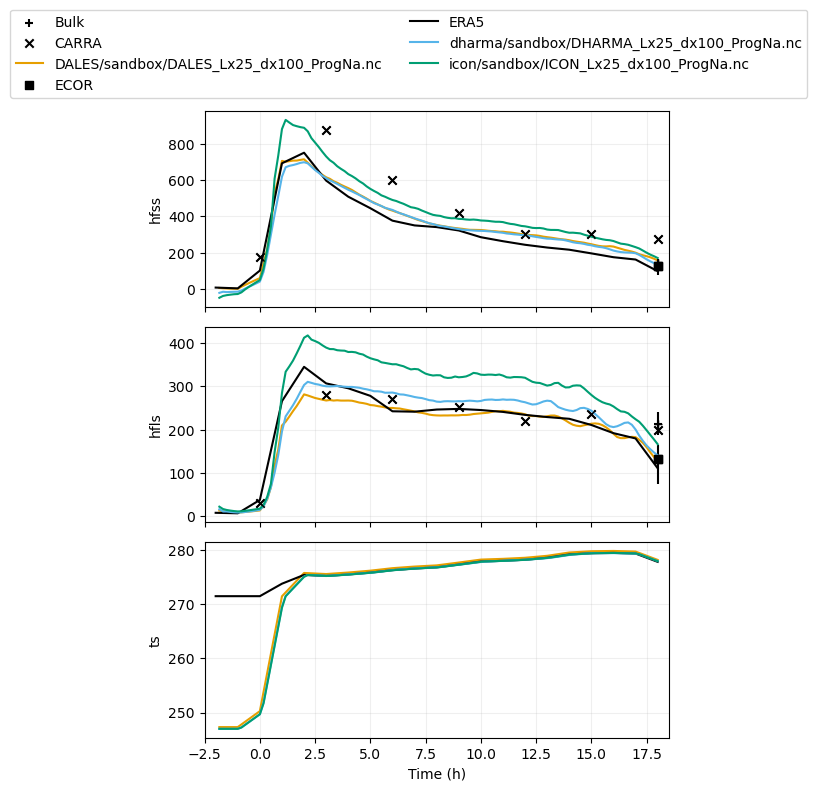

In [4]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d,era5_1d,carra_dat,srfflux_dat]),var_vec_1d)

In [5]:
%run functions_plotting.py 

## load all simulations located in subfolders of the given directory
var_vec_1d = ['lwpr','lwpc','iwp','od'] # variables without ERA5 (shorter time axis)
var_vec_2d = ['theta','qv','qlc','qlr','ta','ua','va'] #,'qic','qis','qig','ua','va','ta']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True,subfolder='sand') #,ignore='ICON')

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
iwp not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
od not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
computing inversion height, cloud-top height, and cloud-top temperature
DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
icon/sandbox/ICON_Lx25_dx100_ProgNa.nc


/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


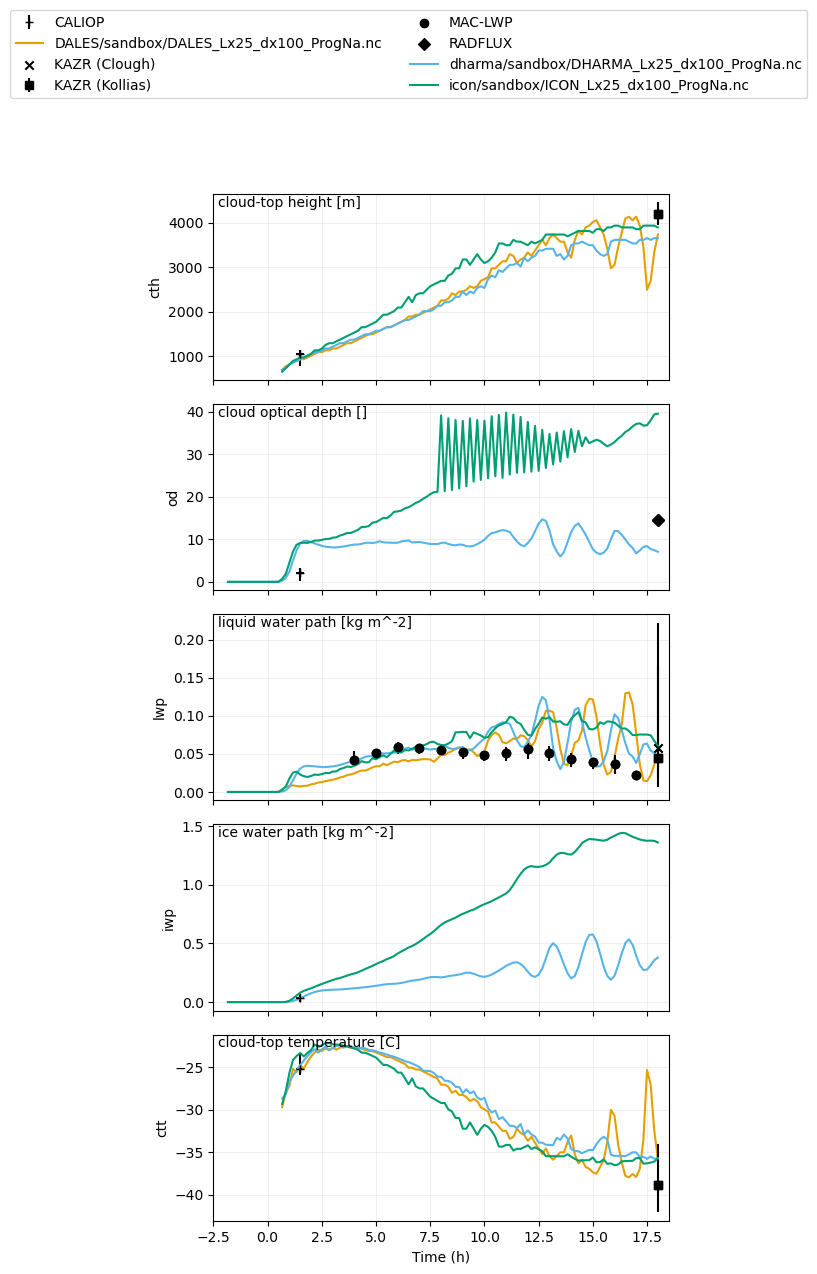

In [6]:
## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat,sentinel_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['zi','od','lwp','iwp','ctt'])
plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])

## plot variables that have only time dependence (for now excluding imager retrievals that are mostly SZA > 70)
#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,gongiwp_dat,radflux_dat]),['od','lwp','iwp']) #'zi','od','lwp','iwp

In [24]:
era5_2d

,class,time,pf,ua,va,w,theta,qv,zf,ta
18.0,ERA5,64800.0,1012.049377,3.761155,-8.429794,-0.027666,270.269867,0.002308,18.167820,271.197296
17.0,ERA5,61200.0,1012.049377,3.726061,-11.233538,0.034034,270.648346,0.002132,13.275071,271.577057
16.0,ERA5,57600.0,1012.049377,4.188862,-11.726610,0.019582,270.504089,0.002079,8.482681,271.432312
15.0,ERA5,54000.0,1012.049377,3.789669,-12.985072,0.001795,270.084229,0.001972,8.890698,271.011017
14.0,ERA5,50400.0,1012.049377,3.932238,-14.237088,0.017544,269.661469,0.001863,9.654793,270.586792
...,...,...,...,...,...,...,...,...,...,...
-6.0,ERA5,-21600.0,0.010000,6.649825,-22.005390,-0.000058,5420.681152,0.000001,76277.929688,201.397369
-7.0,ERA5,-25200.0,0.010000,2.635956,-17.873898,-0.000058,5438.761230,0.000001,76239.414062,202.069107
-8.0,ERA5,-28800.0,0.010000,-1.987671,-13.578048,-0.000058,5432.479492,0.000001,76177.406250,201.835709
-9.0,ERA5,-32400.0,0.010000,-6.703418,-13.392743,-0.000058,5469.329102,0.000001,76284.093750,203.204803


Computing wind speed
Computing wind direction
temporal averaging over 1.0 h interval


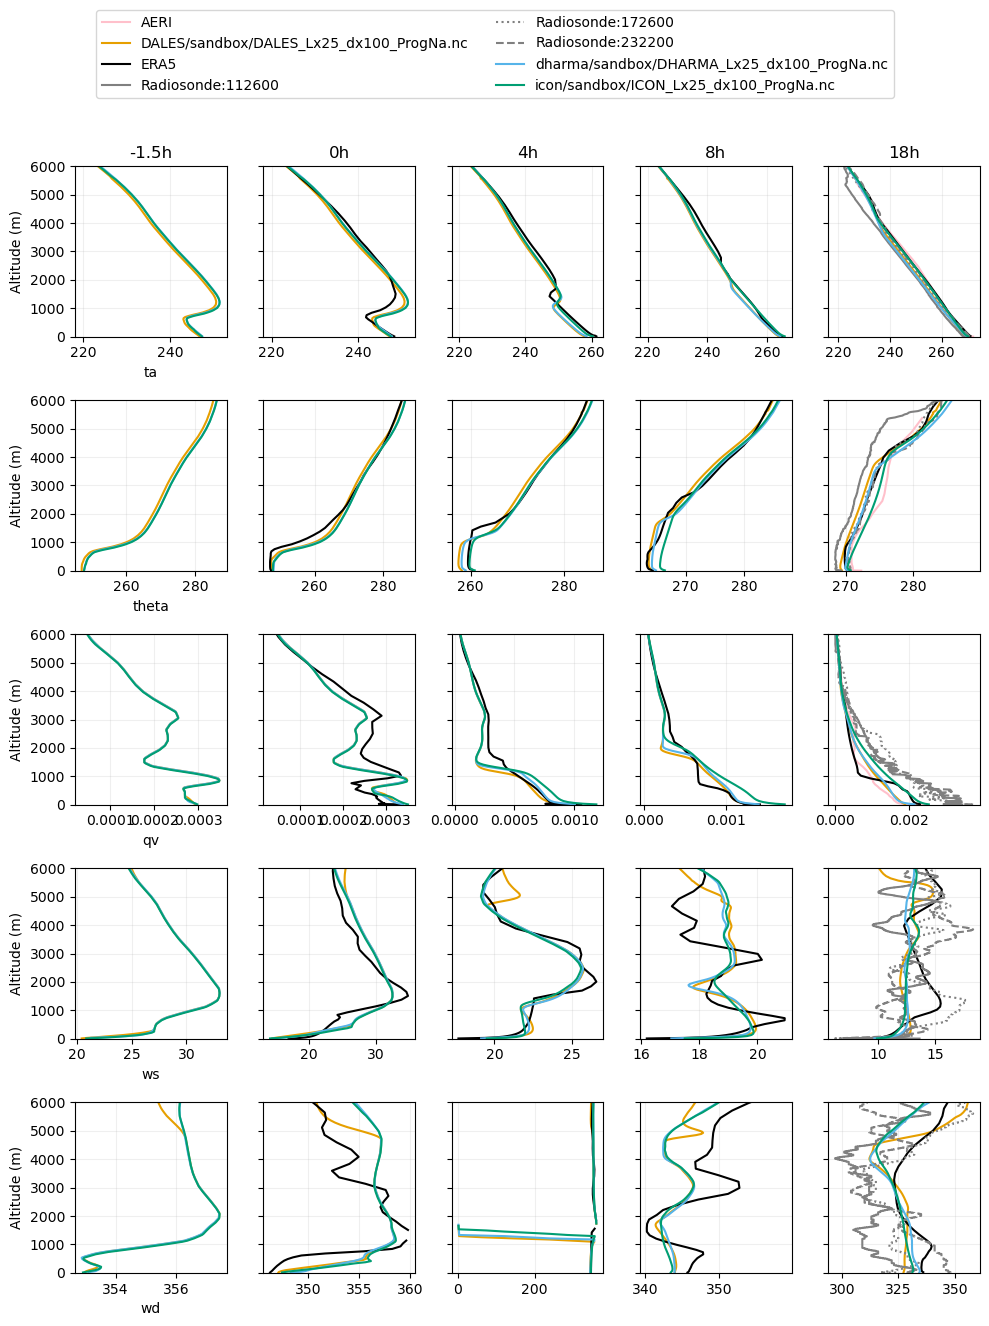

<Figure size 1000x600 with 0 Axes>

In [26]:
## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)

In [ ]:
'ua' in df_col_2d.columns

In [ ]:
df_col_2d.columns